In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotion-dataset/validation.csv
/kaggle/input/emotion-dataset/training.csv
/kaggle/input/emotion-dataset/test.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('/kaggle/input/emotion-dataset/training.csv')
test = pd.read_csv('/kaggle/input/emotion-dataset/test.csv')
validation = pd.read_csv('/kaggle/input/emotion-dataset/validation.csv')

df_complete = pd.concat([train, test, validation], axis = 0)
df_complete.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [4]:
labels_dict = {0:"sadness", 1:"joy", 2:"love", 3:"anger", 4: "fear", 5: "suprise"}
df_complete["emotions"] = df_complete['label'].map(labels_dict)
df_complete.head()

,text,label,emotions
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### Text Preprocessing

In [5]:
!pip install text_hammer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.12.2
    Uninstalling beautifulsoup4-4.12.2:
      Successfully uninstalled beautifulsoup4-4.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.


In [6]:
import text_hammer as th

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
%%time
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
 
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
 
    return(df)

CPU times: user 0 ns, sys: 480 µs, total: 480 µs
Wall time: 450 µs


In [8]:
df_cleaned = text_preprocessing(df_complete,'text')

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

In [9]:
df_cleaned.head()

,text,label,emotions
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [10]:
df_cleaned = df_cleaned.copy()

In [11]:
df_cleaned['length_of_text'] = df_cleaned.text.apply(lambda x: len(x.split()))

In [12]:
df_cleaned.head()

,text,label,emotions,length_of_text
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


In [13]:
df_cleaned.length_of_text.max()

66

Text(0.5, 1.0, 'Plot of Emotions')

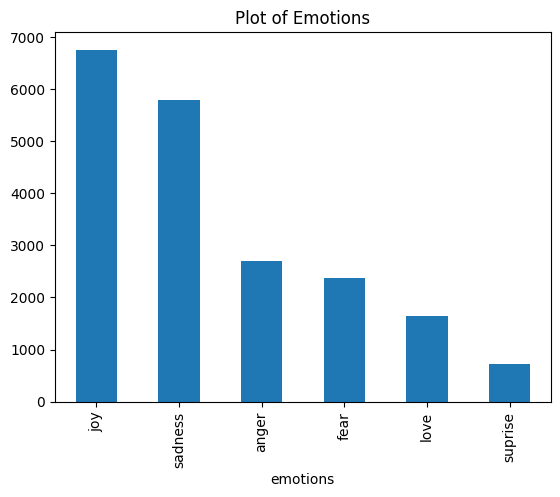

In [14]:
import matplotlib.pyplot as plt
df_complete.emotions.value_counts().plot(kind = "bar")
plt.title("Plot of Emotions")

In [15]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      20000 non-null  object
 1   label     20000 non-null  int64 
 2   emotions  20000 non-null  object
dtypes: int64(1), object(2)
memory usage: 625.0+ KB


In [16]:
df_complete.label = df_complete.label.astype("category")

In [17]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   text      20000 non-null  object  
 1   label     20000 non-null  category
 2   emotions  20000 non-null  object  
dtypes: category(1), object(2)
memory usage: 488.5+ KB


### Train test split

In [18]:
data_texts = df_complete.text
data_labels = df_complete.label

In [25]:
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels, val_labels = train_test_split(data_texts, data_labels, test_size = 0.2, random_state = 42)
train_texts, test_texts, train_labels, test_labels = train_test_split(data_texts, data_labels, test_size = 0.2, random_state = 42)

In [29]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# Tokenize and preprocess the text data
def tokenize_texts(texts):
    encodings = tokenizer(texts, truncation=True, padding=True, max_length=70, return_tensors='tf')
    return encodings

# Tokenize and preprocess the text data
train_encodings = tokenize_texts(train_texts.to_list())
val_encodings = tokenize_texts(val_texts.to_list())
test_encodings = tokenize_texts(test_texts.to_list())

In [30]:
# Convert labels to TensorFlow tensors
train_labels = tf.convert_to_tensor(train_labels)
eval_labels = tf.convert_to_tensor(val_labels)
test_labels = tf.convert_to_tensor(test_labels)

In [31]:
# Create datasets (assuming train_labels and val_labels are integer-encoded)
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels))

In [32]:
# Step 5: Define the Model
num_categories = 6  # Number of emotion categories

model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_categories)

# Step 6: Training
batch_size = 32
num_epochs = 5

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)

model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [33]:
history = model.fit(train_dataset.shuffle(len(train_texts)).batch(batch_size),
                    validation_data=val_dataset.batch(batch_size),
                    epochs=num_epochs)

# Step 7: Testing
test_predictions = model.predict(test_dataset.batch(batch_size))
test_labels_pred = tf.argmax(test_predictions.logits, axis=1)
test_labels_true = test_labels

Epoch 1/5
500/500 [==============================] - 168s 274ms/step - loss: 0.7909 - accuracy: 0.7353 - val_loss: 0.2798 - val_accuracy: 0.9080
Epoch 2/5
500/500 [==============================] - 123s 247ms/step - loss: 0.2183 - accuracy: 0.9252 - val_loss: 0.1691 - val_accuracy: 0.9323
Epoch 3/5
500/500 [==============================] - 122s 245ms/step - loss: 0.1376 - accuracy: 0.9444 - val_loss: 0.1605 - val_accuracy: 0.9315
Epoch 4/5
500/500 [==============================] - 121s 242ms/step - loss: 0.1080 - accuracy: 0.9528 - val_loss: 0.1515 - val_accuracy: 0.9350
Epoch 5/5
125/125 [==============================] - 11s 79ms/step


In [34]:
from sklearn.metrics import classification_report
accuracy = tf.reduce_mean(tf.cast(tf.equal(test_labels_true, test_labels_pred), tf.float32))
classification_rep = classification_report(test_labels_true, test_labels_pred, target_names=["sadness", "joy", "love", "anger", "fear", "suprise"])

In [35]:
print(classification_rep)

              precision    recall  f1-score   support

     sadness       0.96      0.97      0.97      1173
         joy       0.97      0.94      0.95      1339
        love       0.81      0.91      0.86       335
       anger       0.94      0.93      0.93       536
        fear       0.91      0.85      0.88       458
     suprise       0.79      0.83      0.81       159

    accuracy                           0.93      4000
   macro avg       0.89      0.91      0.90      4000
weighted avg       0.93      0.93      0.93      4000



In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels_true, test_labels_pred)

array([[1142,    5,    1,   24,    1,    0],
       [   2, 1256,   70,    0,    2,    9],
       [   2,   26,  306,    1,    0,    0],
       [  15,    6,    2,  498,   15,    0],
       [  28,    3,    0,    9,  391,   27],
       [   3,    2,    0,    0,   22,  132]])

In [37]:
model.save_pretrained("/kaggle/working/")

In [38]:
# Initialize the tokenizer and model (assuming you've already fine-tuned it)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertForSequenceClassification.from_pretrained('/kaggle/working/')  # Replace with the correct path

# Define the new texts you want to predict
texts = ["I am amazed"]

# Preprocess the input texts
preprocessed_texts = []

for text in texts:
    text = str(text).lower()
    text = th.cont_exp(text)  # Apply cont_exp function
    text = th.remove_special_chars(text)  # Remove special characters
    text = th.remove_accented_chars(text)  # Remove accented characters
    preprocessed_texts.append(text)

# Join the list of preprocessed texts back into a single string
preprocessed_text = ' '.join(preprocessed_texts)

# Tokenize and preprocess the new text
new_encodings = tokenizer(preprocessed_text, truncation=True, padding=True, max_length=64, return_tensors='tf')

# Make predictions
new_predictions = model(new_encodings)
new_labels_pred = tf.argmax(new_predictions.logits, axis=1)

labels_dict = {0: 'Sadness 😭', 1: 'Joy 😂', 2: 'Love 😍', 3: 'Anger 😠', 4: 'Fear 😨', 5: 'Surprise 😲'}

# Assuming 'new_labels_pred' contains the predicted class index
predicted_emotion = labels_dict[new_labels_pred[0].numpy()]

# 'predicted_emotion' now contains the emotion label corresponding to the predicted class index
print(predicted_emotion)

Some layers from the model checkpoint at /kaggle/working/ were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /kaggle/working/ and are newly initialized: ['dropout_39']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Surprise 😲


In [40]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 48.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 7.5 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.1-py3-none-any.whl size=5579 sha256=97377cf5e17571c8a32c789b5f2e30d841e8a1b2b02822f1ee8f5aa394d6bb23
  Stored in directory: /root/.cache/pip/wheels/01/a6/d1/1c0828c304a4283b2c1639a09ad86f83d7c487ef34c6b4a1bf
Successfully built ffmpy


In [41]:
import gradio as gr
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification

# Initialize the tokenizer and model (assuming you've already fine-tuned it)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertForSequenceClassification.from_pretrained('/kaggle/working/')  # Replace with the correct path

# Define a function to make predictions
def predict(text):
    # Preprocess the input text
    text = [str(t).lower() for t in text]

    preprocessed_texts = []

    for t in text:
        t = th.cont_exp(t)  # Apply cont_exp function
        t = th.remove_special_chars(t)  # Remove special characters
        t = th.remove_accented_chars(t)  # Remove accented characters
        preprocessed_texts.append(t)

    # Join the list of preprocessed texts back into a single string
    preprocessed_text = ' '.join(preprocessed_texts)

    # Tokenize and preprocess the new text
    new_encodings = tokenizer(preprocessed_text, truncation=True, padding=True, max_length=64, return_tensors='tf')

    # Make predictions
    new_predictions = model(new_encodings)
    probabilities = tf.nn.softmax(new_predictions.logits, axis=-1)

    # Extract class probabilities
    class_probabilities = {labels_dict[i]: float(prob) for i, prob in enumerate(probabilities[0])}

    return class_probabilities

# Create a Gradio interface
iface = gr.Interface(
    fn=predict,
    inputs=gr.inputs.Textbox(placeholder="Enter a text here", label="Input text", lines=5),
    outputs=gr.outputs.Label(label="Emotion Probabilities"),
    verbose=True,
    examples=["He blinked in disbelief as the lottery numbers on the ticket matched the winning numbers."],
    title="Emotion Classification",
    description="Predict the emotion probabilities of a text using a fine-tuned DistilBERT model.",
    theme="grass"
)

# Launch the Gradio interface
iface.launch()

Some layers from the model checkpoint at /kaggle/working/ were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /kaggle/working/ and are newly initialized: ['dropout_59']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_67/1585145121.py:40: GradioDeprecationWarning: Usage of gra

Running on local URL:  http://127.0.0.1:7860
Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Running on public URL: https://4bdf6845e381d5f718.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
